### **Emergency vs Non-Emergency vehicles Image Classification with CNN and MobileNetV2 Transfer Learning**

In [1]:
# dataset pathway
!ls '/content/drive/MyDrive/Emergency vs Non-Emergency vehicles'

dataset


In [2]:
!ls '/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset'

images			       test_vc2kHdQ.csv  train_SOaYf6m
sample_submission_yxjOnvz.csv  train.csv


In [3]:
# load training data output 
import pandas as pd
train_csv = pd.read_csv('/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/train.csv')
train_csv.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [4]:
len(train_csv)

6584

- **There are 6584 train data images label**

In [5]:
# load test data output 
test_csv = pd.read_csv('/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/sample_submission_yxjOnvz.csv')
test_csv.head()

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,0
2,2082.jpg,0
3,808.jpg,0
4,1907.jpg,0


In [6]:
len(test_csv)

706

In [7]:
# Get the names of the images names
import os 

# specify the img directory path
out_path = '/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images'

# list files in img directory
out_files = os.listdir(out_path)
images_data_names = []
for file in out_files:
    # make sure file is an image
    if file.endswith('.jpg'):
        images_data_names.append(file)


In [8]:
# top 10 records 
images_data_names[:5]

['791.jpg', '7911.jpg', '7912.jpg', '7913.jpg', '7915.jpg']

In [9]:
# total number of images
len(images_data_names)

7290

- **There are 7290 images which account for both the training and test data whose labels have already been separated**

**SEPARATE THE TRAINING DATA FROM THE FULL IMAGE DATA BY THEIR OUPUT**

In [10]:
train_csv.head(3)

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0


## **train_emergency_dataframe**

In [11]:
train_emergency_csv = train_csv[train_csv['emergency_or_not'] == 1]
train_emergency_csv.sort_values('image_names', inplace = True)
train_emergency_csv.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,image_names,emergency_or_not
880,0.jpg,1
1489,1.jpg,1
545,10.jpg,1


### **train_emergency_images_path**

In [12]:
# full images path
target_folder = '/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images/' 

In [13]:
# train_emergency_images_path
train_emergency_image_names = train_emergency_csv['image_names']
train_emergency_images_path = [target_folder + t for t in train_emergency_image_names]
train_emergency_images_path[:3]

['/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images/0.jpg',
 '/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images/1.jpg',
 '/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images/10.jpg']

In [14]:
# train_non_emergency_labels
train_emergency_labels = train_emergency_csv['emergency_or_not']
train_emergency_labels.head(3)

880     1
1489    1
545     1
Name: emergency_or_not, dtype: int64

In [15]:

# train_non_emergency_dataframe
train_non_emergency_csv = train_csv[train_csv['emergency_or_not'] == 0]
train_non_emergency_csv.sort_values('image_names', inplace = True)
train_non_emergency_csv.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,image_names,emergency_or_not
1325,1002.jpg,0
1318,1003.jpg,0
200,1005.jpg,0


In [16]:
# train_non_emergency_image_names
train_non_emergency_image_names = train_non_emergency_csv['image_names']
train_non_emergency_images_path = [target_folder + t for t in train_non_emergency_image_names]
train_non_emergency_images_path[:3]

['/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images/1002.jpg',
 '/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images/1003.jpg',
 '/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images/1005.jpg']

In [17]:
# train_non_emergency_labels
train_non_emergency_labels = train_non_emergency_csv['emergency_or_not']
train_non_emergency_labels.head()

1325    0
1318    0
200     0
590     0
524     0
Name: emergency_or_not, dtype: int64

**SEPARATE THE TESTING DATA FROM THE FULL IMAGE DATA BY THEIR OUPUT**

In [18]:
test_csv['emergency_or_not'].value_counts()

0    706
Name: emergency_or_not, dtype: int64

**Apparently, all the test data are of all non_emergency class**

In [19]:
# test dataframe
test_csv.sort_values('image_names', inplace = True)
test_csv.head(3)

,image_names,emergency_or_not
96,100.jpg,0
684,1000.jpg,0
587,1001.jpg,0


In [20]:
# test_images_path
test_image_names = test_csv['image_names']
test_images_path = [target_folder + t for t in test_image_names]
test_images_path[:3]

['/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images/100.jpg',
 '/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images/1000.jpg',
 '/content/drive/MyDrive/Emergency vs Non-Emergency vehicles/dataset/images/1001.jpg']

In [21]:
# test_labels
test_labels = test_csv['emergency_or_not']
test_labels.head(3)

96     0
684    0
587    0
Name: emergency_or_not, dtype: int64

### **Emergency and Non Emergency Dict**

In [22]:
emergency_non_emergency_images_path_dict = {
    'Emergency' : list(train_emergency_images_path), 
    'Non_Emergency' : list(train_non_emergency_images_path) + list(test_images_path)
}

- **I joined train_non_emergency_images_path and test_images_path as they both belong to the Non Emergency class**

In [23]:
print(len(train_emergency_images_path))
print(len(train_non_emergency_images_path))
print(len(test_images_path))

2724
3860
706


In [24]:
len(emergency_non_emergency_images_path_dict['Emergency'])

2724

In [25]:
len(emergency_non_emergency_images_path_dict['Non_Emergency'])

4566

In [26]:
emergency_non_emergency_labels_dict = {
    'Emergency' : 1, 
    'Non_Emergency' : 0
}

In [27]:
emergency_non_emergency_labels_dict

{'Emergency': 1, 'Non_Emergency': 0}

### **CREATE TRAINING IMAGE 3D arrays as X and IMAGE LABELS as y**

In [28]:
X, y = [], [] 

import cv2 

for image_cls, image_pth in emergency_non_emergency_images_path_dict.items(): 
  for image_p in image_pth: 
    img = cv2.imread(image_p)
    resized = cv2.resize(img, (160, 160)) 
    X.append(resized)
    y.append(emergency_non_emergency_labels_dict[image_cls])

In [29]:
X[0]

array([[[141, 134, 115],
        [142, 135, 116],
        [143, 136, 117],
        ...,
        [ 92,  86,  75],
        [ 91,  85,  74],
        [ 98,  92,  81]],

       [[141, 134, 115],
        [142, 135, 116],
        [143, 136, 117],
        ...,
        [ 98,  92,  81],
        [ 95,  89,  78],
        [ 95,  90,  78]],

       [[141, 134, 115],
        [142, 135, 116],
        [143, 136, 117],
        ...,
        [ 90,  84,  73],
        [ 85,  79,  68],
        [ 94,  88,  77]],

       ...,

       [[ 40,  42,  42],
        [ 35,  37,  37],
        [ 36,  38,  38],
        ...,
        [ 29,  31,  32],
        [ 32,  34,  35],
        [ 35,  37,  38]],

       [[ 36,  38,  38],
        [ 34,  36,  36],
        [ 34,  36,  36],
        ...,
        [ 32,  34,  35],
        [ 40,  43,  43],
        [ 37,  39,  40]],

       [[ 32,  34,  34],
        [ 31,  33,  33],
        [ 30,  32,  32],
        ...,
        [ 34,  36,  37],
        [ 37,  39,  40],
        [ 22,  24,  25]]

In [30]:
y[:5]

[1, 1, 1, 1, 1]

**PLOT RANDOM IMAGES WITH CLASS TO AUTHETICATE THAT THE VEHICLE MATCH THE CLASS**

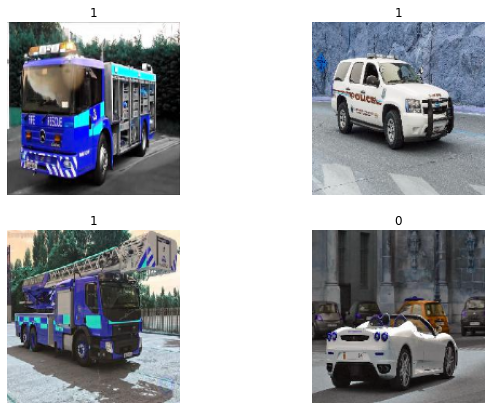

In [31]:
import random 
import matplotlib.pyplot as plt 

# plot random images 
plt.figure(figsize = (10, 7))
for i in range(4): 
  ax = plt.subplot(2, 2, i+1)
  random_int = random.choice(range(len(X))) 
  plt.imshow(X[random_int])
  plt.title(y[random_int])
  plt.axis(False)

- **The images are correctly paired with the labels**

### **SPLIT THE DATASET INTO 2 HALVES** 

  > I will be using half of the data for the training, validating and testing of the model. As I attempted to use the full dataset, I kept suffering from session crash due to RAM overloading during the Normalization process. Having exploited various options to get around the session crash to no avail, I had to settle for this solution

In [32]:
# import train_test_split 
# train_test and validation data
from sklearn.model_selection import train_test_split 
X_half1, X_half2, y_half1, y_half2 = train_test_split(X, y, 
                                                    random_state = 20, test_size = .50)

### **SPLIT THE DATASET RANDOMLY TO TRAINING, VALIDATING AND TESTING DATASET**

In [33]:
# import train_test_split 
# train_test and validation data
from sklearn.model_selection import train_test_split 
X_train_full, X_test, y_train_full, y_test = train_test_split(X_half1, y_half1, 
                                                    random_state = 20, test_size = .20)

In [34]:
# import train_test_split 
# train and test data
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, 
                                                    random_state = 20, test_size = .20)

### **CONVERT THE IMAGE 3D ARRAYS INTO NUMPY ARRAYS**

In [35]:
# import numpy 
import numpy as np

In [36]:
X_train = np.array(X_train) 
y_train = np.array(y_train)

In [37]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [38]:
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

### **NORMALIZE(RESCALE) ALL THE IMAGES TO BETWEEN 0 AND 1**

In [39]:
X_train_scaled = X_train / 255.0

In [40]:
X_test_scaled = X_test / 255.0

In [41]:
X_valid_scaled = X_valid / 255.0

In [42]:
X_train_scaled[0].dtype

dtype('float64')

In [43]:
pd.Series(y_train).value_counts()

0    1476
1     856
dtype: int64

In [44]:
pd.Series(y_valid).value_counts()

0    360
1    224
dtype: int64

In [45]:
pd.Series(y_test).value_counts()

0    434
1    295
dtype: int64

### **BUILD A CNN MODEL WITH MAXPOOLING LAYER**

In [46]:
# import necessary libraries 
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout 

In [47]:
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import Adam

In [48]:
# create a model with MaxPool 
tf.random.set_seed(25)
cnn_1 = Sequential([
    Conv2D(filters = 16, 
           kernel_size = 3, # can also be (3, 3) 
           padding = 'same', 
           activation = 'relu', 
           input_shape = (160, 160, 3)), 
    MaxPool2D(pool_size = (2, 2)),  
    Conv2D(16, 3, padding = 'same', activation = 'relu'), 
    MaxPool2D(pool_size = 2),
    Conv2D(16, 3, padding = 'same', activation = 'relu'), 
    MaxPool2D(),
    Flatten(), 
    Dense(2, activation = 'sigmoid')
])

In [49]:
# compile the model
cnn_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = 'adam', 
              metrics = ['accuracy'])

### **CREATE CALLBACKS**

In [50]:
# create callback TensorBoard function 
import datetime 
def create_tensorboard_callback(dir_name, experiment_name): 
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir
  )
  print(f'Saving TensorBoard log files to: {log_dir}')
  return tensorboard_callback

In [51]:
history_1 = cnn_1.fit(x = X_train_scaled, 
                      y = y_train,  
                      epochs = 15, validation_data = (X_valid_scaled, y_valid), 
                      callbacks = [create_tensorboard_callback('tensorflow_hub', 'cnn_1')]) 

Saving TensorBoard log files to: tensorflow_hub/cnn_1/20230117-051543
Epoch 1/15
73/73 [==============================] - 11s 28ms/step - loss: 0.6434 - accuracy: 0.6454 - val_loss: 0.6312 - val_accuracy: 0.6798
Epoch 2/15
73/73 [==============================] - 1s 17ms/step - loss: 0.5759 - accuracy: 0.7050 - val_loss: 0.6099 - val_accuracy: 0.6627
Epoch 3/15
73/73 [==============================] - 1s 19ms/step - loss: 0.5331 - accuracy: 0.7363 - val_loss: 0.5706 - val_accuracy: 0.6952
Epoch 4/15
73/73 [==============================] - 1s 17ms/step - loss: 0.4888 - accuracy: 0.7573 - val_loss: 0.5607 - val_accuracy: 0.7295
Epoch 5/15
73/73 [==============================] - 1s 17ms/step - loss: 0.4792 - accuracy: 0.7646 - val_loss: 0.6277 - val_accuracy: 0.6575
Epoch 6/15
73/73 [==============================] - 1s 17ms/step - loss: 0.4450 - accuracy: 0.7942 - val_loss: 0.6427 - val_accuracy: 0.6935
Epoch 7/15
73/73 [==============================] - 1s 17ms/step - loss: 0.4032 - a

- **When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished**

In [52]:
cnn_1.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 0s 16ms/step - loss: 0.8947 - accuracy: 0.7257


[0.8946864604949951, 0.7256515622138977]

- **The model improved and generalized better on the test data after adding the MaxPool Layer**

### **CREATE A FUNCTION THAT PLOTS LOSS AND ACCURACY CURVE FOR TRAINING AND VALIDATION DATA SEPARATELY**

In [53]:
# plot the validation and training data separately 
def plot_loss_curves(history): 
  '''
  Returns separate loss and accuracy curves for training and validation metrics
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss'] 

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy'] 

  epochs = range(len(history.history['loss'])) 

  # plot loss 
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'Val_loss')
  plt.xlabel('Epochs')
  plt.title('Loss curve')
  plt.legend()

  # plot accuarcy 
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.xlabel('Epochs')
  plt.title('Accuracy curve')
  plt.legend();

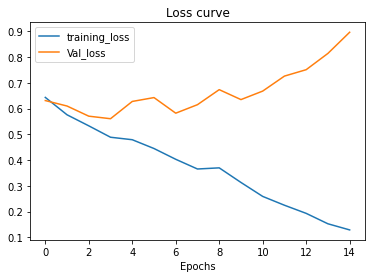

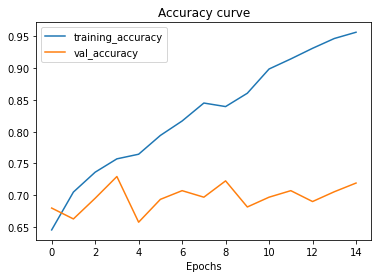

In [54]:
# loss and accuracy curve
plot_loss_curves(history_1)

### **PERFORM DATA AUGMENTATION**

In [55]:
from tensorflow.keras import layers
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomContrast(0.5), 
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal"), 
    layers.experimental.preprocessing.RandomZoom(0.2)
])

### **CNN MODEL WITH AUGMENTED DATA AND DROPOUT REGULARIZATION**

In [56]:
# create a model 
tf.random.set_seed(42)
cnn_2 = Sequential([ 
    data_augmentation,
    Conv2D(filters = 16, 
           kernel_size = 3, # can also be (3, 3) 
           padding = 'same', 
           activation = 'relu', 
           input_shape = (160, 160, 3)), 
    Conv2D(16, 3, padding = 'same', activation = 'relu'), 
    Conv2D(16, 3, padding = 'same', activation = 'relu'),
    Conv2D(16, 3, padding = 'same', activation = 'relu'), 
    Flatten(),
    Dropout(0.5),
    Dense(500, activation = 'relu'), 
    Dropout(0.5),
    Dense(2, activation = 'sigmoid')
])

In [57]:
# compile the model
cnn_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [59]:
# fit the model
history_2 = cnn_2.fit(x = X_train_scaled, 
                      y = y_train,  
                      epochs = 20, validation_data = (X_valid_scaled, y_valid), 
                      callbacks = [create_tensorboard_callback('tensorflow_hub', 'cnn_2')]) 

Saving TensorBoard log files to: tensorflow_hub/cnn_2/20230117-052128
Epoch 1/20
73/73 [==============================] - 24s 326ms/step - loss: 0.4415 - accuracy: 0.7967 - val_loss: 0.5317 - val_accuracy: 0.7637
Epoch 2/20
73/73 [==============================] - 15s 210ms/step - loss: 0.4248 - accuracy: 0.8113 - val_loss: 0.5438 - val_accuracy: 0.7568
Epoch 3/20
73/73 [==============================] - 15s 211ms/step - loss: 0.4225 - accuracy: 0.8135 - val_loss: 0.5603 - val_accuracy: 0.7740
Epoch 4/20
73/73 [==============================] - 15s 207ms/step - loss: 0.4209 - accuracy: 0.8139 - val_loss: 0.5589 - val_accuracy: 0.7654
Epoch 5/20
73/73 [==============================] - 15s 210ms/step - loss: 0.4029 - accuracy: 0.8225 - val_loss: 0.5466 - val_accuracy: 0.7620
Epoch 6/20
73/73 [==============================] - 15s 209ms/step - loss: 0.3917 - accuracy: 0.8319 - val_loss: 0.5596 - val_accuracy: 0.7671
Epoch 7/20
73/73 [==============================] - 15s 211ms/step - los

### **MODEL SUMMARY**

In [60]:
cnn_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 160, 16)      448       
                                                                 
 conv2d_4 (Conv2D)           (None, 160, 160, 16)      2320      
                                                                 
 conv2d_5 (Conv2D)           (None, 160, 160, 16)      2320      
                                                                 
 conv2d_6 (Conv2D)           (None, 160, 160, 16)      2320      
                                                                 
 flatten_1 (Flatten)         (None, 409600)            0         
                                                                 
 dropout (Dropout)           (None, 409600)           

### **MODEL EVALUATION**

In [61]:
cnn_2.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 1s 27ms/step - loss: 0.5906 - accuracy: 0.7888


[0.5905647277832031, 0.7887517213821411]

- **This model generalized better compared to the previous ones**

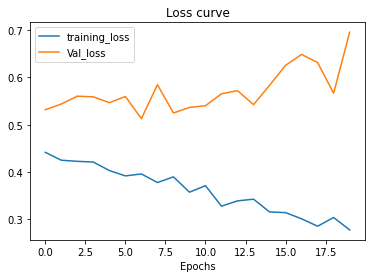

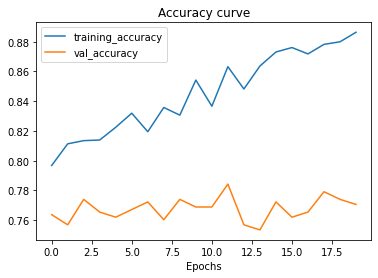

In [62]:
# loss and accuracy curve
plot_loss_curves(history_2)

### **TEST DATA PREDICTION**

In [63]:
# prediction probabilities
cnn_2_pred_probs = cnn_2.predict(X_test_scaled)

23/23 [==============================] - 1s 21ms/step


In [64]:
# prediction class 
cnn_2_pred = cnn_2_pred_probs.argmax(axis = 1) 
cnn_2_pred[:10]

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

### **CONFUSION MATRIX AND CLASSIFICATION REPORT**

In [65]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_true=y_test, 
                 y_pred=cnn_2_pred)

array([[382,  52],
       [102, 193]])

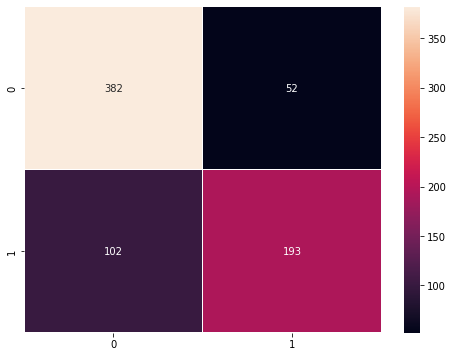

In [66]:
# prettified confusion matrix
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_true=y_test, 
                 y_pred=cnn_2_pred), annot = True, fmt = 'd', linewidth = 0.4)
plt.show()

In [67]:
# recall, precision, f1-score
print(classification_report(y_true=y_test, 
                 y_pred=cnn_2_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       434
           1       0.79      0.65      0.71       295

    accuracy                           0.79       729
   macro avg       0.79      0.77      0.77       729
weighted avg       0.79      0.79      0.78       729



### **SAVE THE MODEL**

In [ ]:
cnn_2.save('Emervgency_vs_Non_emergency_CNN_clf.h5')

### **TRANSFER LEARNING** 

#### **Model Architecture to use** 
> - **imagenet/mobilenet_v2_100_160/feature_vector**

In [68]:
mobilenetv2_url = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_160/feature_vector/5'

In [69]:
import tensorflow_hub as hub

In [70]:
# create the transfer learning model
mobilenet_model = tf.keras.Sequential([
    hub.KerasLayer(mobilenetv2_url, trainable = False, 
                   name = 'Feature_Extractor_Layer', input_shape = (160, 160, 3)), 
    layers.Dense(2, activation = 'sigmoid', name = 'output_layer')
])

In [71]:
# compile the model
mobilenet_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                        optimizer = tf.keras.optimizers.Adam(), 
                        metrics = ['accuracy'])

In [72]:
# fit the model
mobilenet_model_history = mobilenet_model.fit(x = X_train_scaled, 
                      y = y_train,  
                      epochs = 7, validation_data = (X_valid_scaled, y_valid), 
                      callbacks = [create_tensorboard_callback('tensorflow_hub', 'mobilenet_model')]) 

Saving TensorBoard log files to: tensorflow_hub/mobilenet_model/20230117-052834
Epoch 1/7
73/73 [==============================] - 13s 63ms/step - loss: 0.4325 - accuracy: 0.8045 - val_loss: 0.3414 - val_accuracy: 0.8613
Epoch 2/7
73/73 [==============================] - 2s 34ms/step - loss: 0.2943 - accuracy: 0.8748 - val_loss: 0.3158 - val_accuracy: 0.8664
Epoch 3/7
73/73 [==============================] - 2s 30ms/step - loss: 0.2594 - accuracy: 0.8945 - val_loss: 0.3058 - val_accuracy: 0.8664
Epoch 4/7
73/73 [==============================] - 2s 30ms/step - loss: 0.2360 - accuracy: 0.9022 - val_loss: 0.3042 - val_accuracy: 0.8699
Epoch 5/7
73/73 [==============================] - 2s 33ms/step - loss: 0.2175 - accuracy: 0.9082 - val_loss: 0.2995 - val_accuracy: 0.8733
Epoch 6/7
73/73 [==============================] - 2s 31ms/step - loss: 0.2030 - accuracy: 0.9155 - val_loss: 0.3024 - val_accuracy: 0.8767
Epoch 7/7
73/73 [==============================] - 3s 39ms/step - loss: 0.1891 

In [73]:
mobilenet_model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 1s 39ms/step - loss: 0.2841 - accuracy: 0.8779


[0.28405022621154785, 0.8779149651527405]

### **TRANSFER LEARNING LOSS AND ACCURACY CURVE**

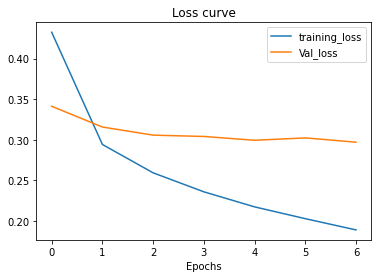

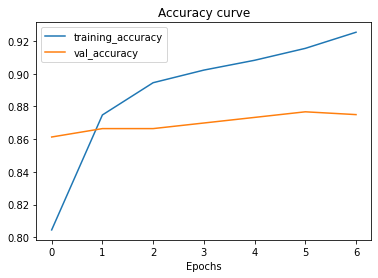

In [80]:
plot_loss_curves(mobilenet_model_history)

### **TRANSFER LEARNING TEST DATA PREDICTION**

In [74]:
# prediction probabilities
mobilenet_pred_probs = mobilenet_model.predict(X_test_scaled) 
mobilenet_pred_probs[0]

23/23 [==============================] - 1s 24ms/step


array([0.85542464, 0.12282786], dtype=float32)

In [75]:
# prediction class 
mobilenet_pred = mobilenet_pred_probs.argmax(axis = 1) 
mobilenet_pred[:10]

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

### **TRANSFER LEARNING CONFUSION MATRIX AND CLASSIFICATION REPORT**

In [76]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_true=y_test, 
                 y_pred=mobilenet_pred)

array([[389,  45],
       [ 44, 251]])

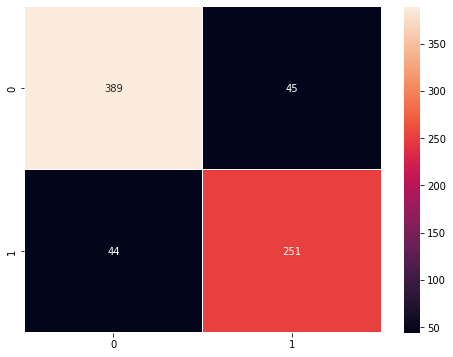

In [77]:
# prettified confusion matrix
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_true=y_test, 
                 y_pred=mobilenet_pred), annot = True, fmt = 'd', linewidth = 0.4)
plt.show()

In [78]:
# recall, precision, f1-score
print(classification_report(y_true=y_test, 
                 y_pred=mobilenet_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       434
           1       0.85      0.85      0.85       295

    accuracy                           0.88       729
   macro avg       0.87      0.87      0.87       729
weighted avg       0.88      0.88      0.88       729



### **SAVE THE MODEL**

In [87]:
mobilenet_model.save('mobilenetV2_TL_model.h5')

### **UPLOADING MODELS TO TENSORBOARD**

In [79]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "CNN_maxpool vs CNN_aug vs MobileNetV2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=O35G03aIfNSKtmV7icfPp06O3mKMxW&prompt=consent&access_type=off